In [3]:
import pandas as pd
import numpy as np

In [67]:
sms_data = pd.read_csv('spam.csv')

In [68]:
sms_data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [69]:
sms_data.shape


(5572, 5)

In [70]:
sms_data = sms_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'])

In [71]:
sms_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [72]:
sms_data.sample(5)

,v1,v2
1647,ham,Evening * v good if somewhat event laden. Will...
2137,ham,Then why you came to hostel.
4765,ham,Whens your radio show?
2504,ham,"Hello, my boytoy! I made it home and my consta..."
534,ham,I've not called you in a while. This is hoping...


In [73]:
sms_data.rename(columns={'v1':'Target','v2':'Text'}, inplace=True)

In [74]:
sms_data

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will �_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [75]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [76]:
sms_data['Target'] = encoder.fit_transform(sms_data['Target'])

In [77]:
sms_data

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will �_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [78]:
sms_data.isnull().sum()

Target    0
Text      0
dtype: int64

In [79]:
sms_data.duplicated().sum()

403

In [80]:
sms_data = sms_data.drop_duplicates(keep = 'first')

In [81]:
sms_data.duplicated().sum()

0

In [82]:
sms_data.shape

(5169, 2)

## EDA

In [83]:
sms_data['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x283750f4b80>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

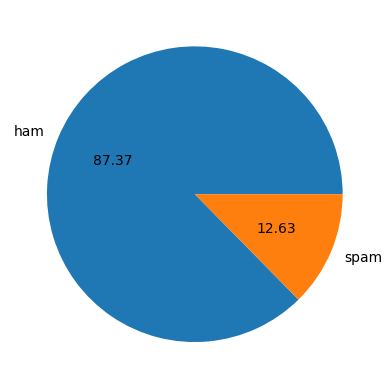

In [84]:
import matplotlib.pyplot as plt
plt.pie(sms_data['Target'].value_counts(), labels=['ham','spam'], autopct='%0.2f')
#autopct allows you to print the percent value

In [85]:
! pip install nltk

You should consider upgrading via the 'C:\Users\marti\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip' command.


In [86]:
import nltk

In [87]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\marti\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [88]:
sms_data['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    160
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [89]:
sms_data['num_character'] = sms_data['Text'].apply(len)

C:\Users\marti\AppData\Local\Temp\ipykernel_35472\444459921.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_data['num_character'] = sms_data['Text'].apply(len)


In [90]:
sms_data

,Target,Text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160
5568,0,Will �_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [91]:
sms_data['num_words'] = sms_data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\marti\AppData\Local\Temp\ipykernel_35472\603381436.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_data['num_words'] = sms_data['Text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [92]:
sms_data

,Target,Text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15
...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35
5568,0,Will �_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27


In [93]:
sms_data['num_sentences'] = sms_data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\marti\AppData\Local\Temp\ipykernel_35472\2027329581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_data['num_sentences'] = sms_data['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [94]:
sms_data

,Target,Text,num_character,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,160,35,4
5568,0,Will �_ b going to esplanade fr home?,37,9,1
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2
5570,0,The guy did some bitching but I acted like i'd...,125,27,1


In [95]:
sms_data[["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.924163,18.456761,1.966531
std,58.175349,13.325633,1.449833
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [96]:
#for ham
sms_data[sms_data["Target"]==0][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.457263,17.123782,1.820195
std,56.357463,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [97]:
#for spam
sms_data[sms_data["Target"]==1][["num_character","num_words","num_sentences"]].describe()

,num_character,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.479326,27.675345,2.978560
std,30.014336,7.011513,1.493185
min,13.000000,2.000000,1.000000
25%,131.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [98]:
import seaborn as sns

<Axes: ylabel='Count'>

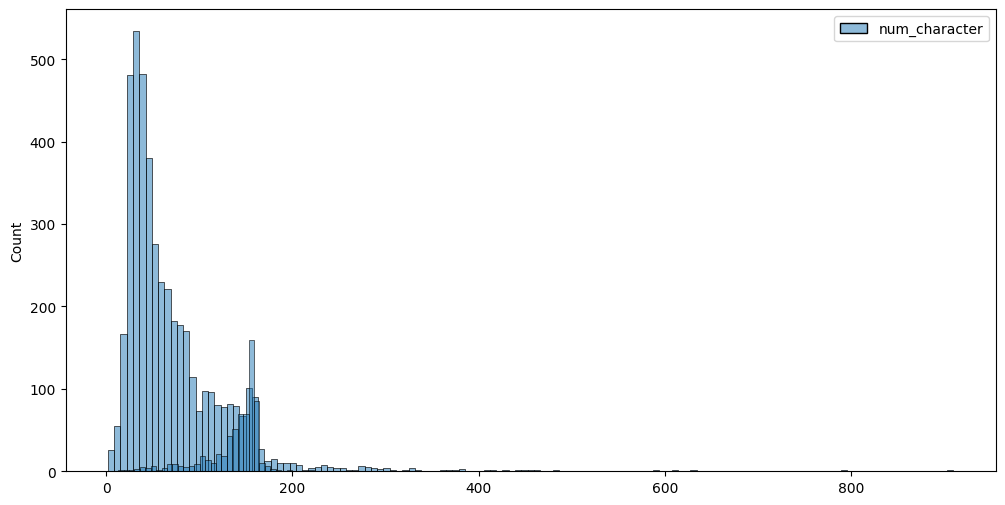

In [99]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data["Target"]==0][["num_character"]], color='green')
sns.histplot(sms_data[sms_data["Target"]==1][["num_character"]], color='red')

<Axes: ylabel='Count'>

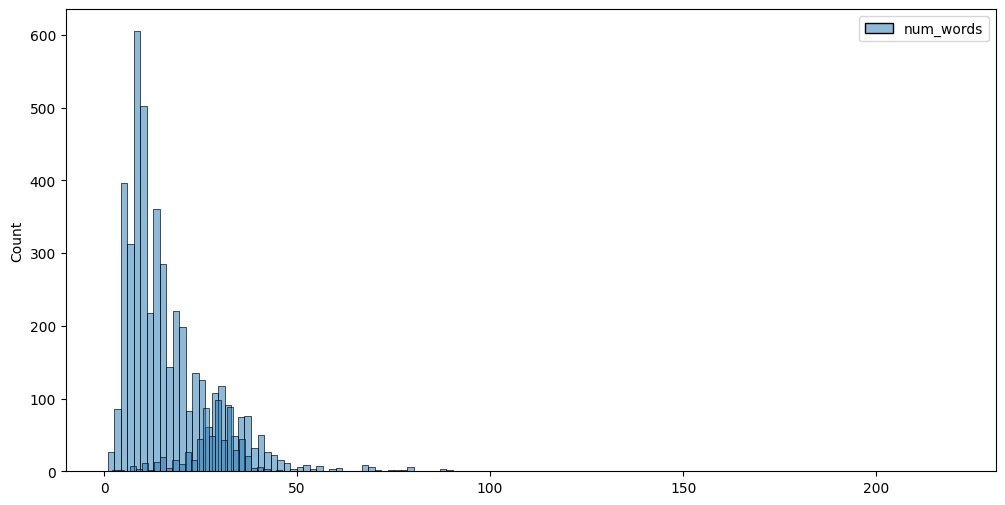

In [100]:
plt.figure(figsize=(12,6))
sns.histplot(sms_data[sms_data["Target"]==0][["num_words"]], color='green')
sns.histplot(sms_data[sms_data["Target"]==1][["num_words"]], color='red')

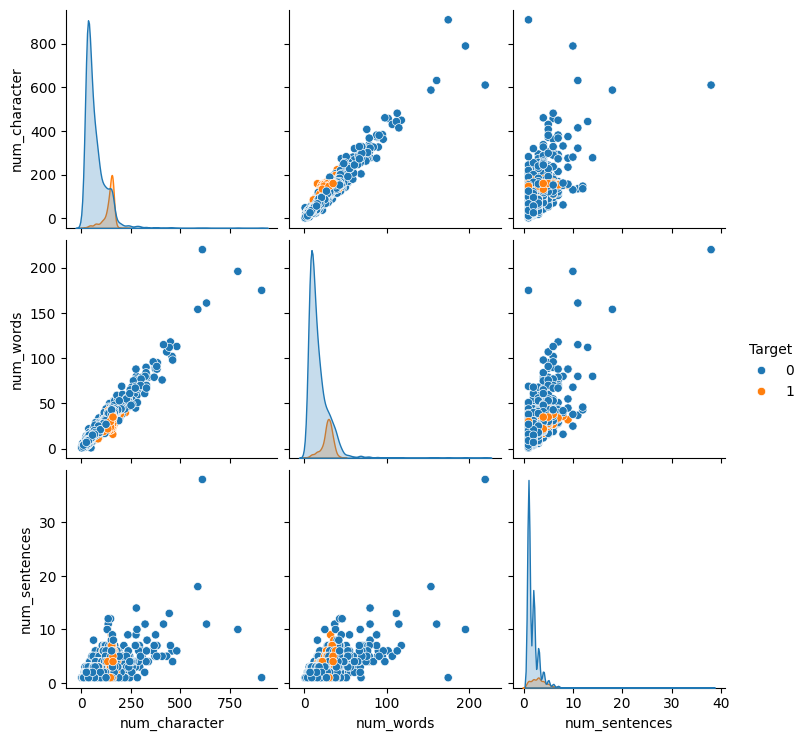

In [101]:
sns.pairplot(sms_data, hue='Target')

In [42]:
sms_data = sms_data.drop('Text', axis=1)

In [43]:
sms_data.corr()

,Target,num_character,num_words,num_sentences
Target,1.000000,0.382779,0.263086,0.265459
num_character,0.382779,1.000000,0.966066,0.624236
num_words,0.263086,0.966066,1.000000,0.680021
num_sentences,0.265459,0.624236,0.680021,1.000000


<Axes: >

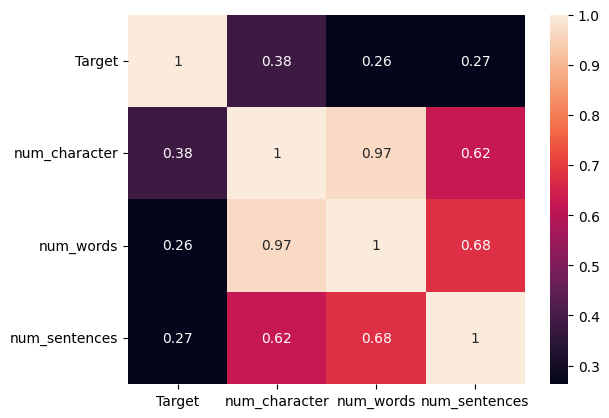

In [45]:
sns.heatmap(sms_data.corr(), annot=True)

Data Preprocessing

Lower case
<br>
Tokenization
<br>
Removing special characters
<br>
Removing stop words and punctuation
<br>
Stemming

In [56]:
from nltk.corpus import stopwords

In [57]:
import string

In [62]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [106]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return ' '.join(y)

In [107]:
transform_text("Hi! How are you? I liked your shirt yesterday")

'hi like shirt yesterday'

In [108]:
sms_data['transformed_text'] = sms_data['Text'].apply(transform_text)

C:\Users\marti\AppData\Local\Temp\ipykernel_35472\595342834.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sms_data['transformed_text'] = sms_data['Text'].apply(transform_text)


In [109]:
sms_data.head()

,Target,Text,num_character,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [111]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [119]:
spam_wc = wc.generate(sms_data[sms_data['Target']==1]['transformed_text'].str.cat(sep=' '))

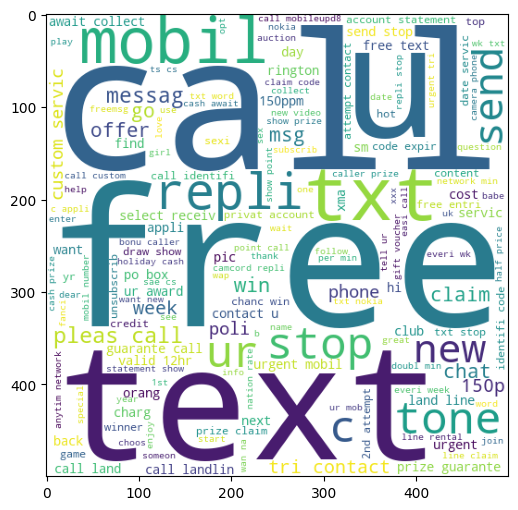

In [120]:
plt.figure(figsize=(15,6))
plt.imshow(span_wc)

In [121]:
ham_wc = wc.generate(sms_data[sms_data['Target']==0]['transformed_text'].str.cat(sep=' '))

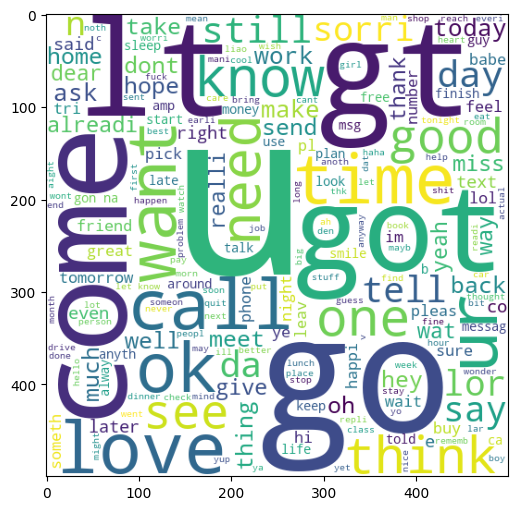

In [122]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [151]:
spam_corpus=[]
for msg in sms_data[sms_data['Target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)


In [152]:
len(spam_corpus)

9941

In [153]:
pd.DataFrame(Counter(spam_corpus).most_common(30))[0]

0        call
1        free
2           2
3         txt
4        text
5           u
6          ur
7       mobil
8        stop
9       repli
10      claim
11          4
12      prize
13        get
14        new
15     servic
16       tone
17       send
18     urgent
19      nokia
20    contact
21      award
22      phone
23       cash
24      pleas
25       week
26        win
27          c
28    collect
29        min
Name: 0, dtype: object

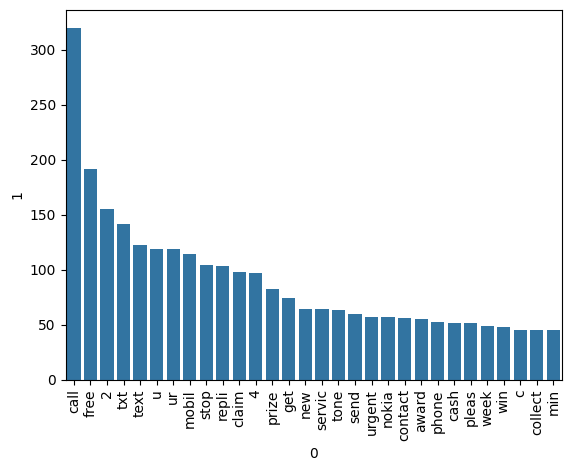

In [154]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [155]:
ham_corpus=[]
for msg in sms_data[sms_data['Target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [156]:
len(ham_corpus)

35305

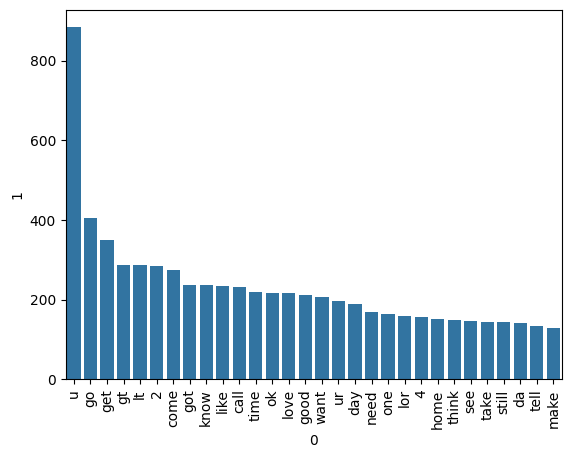

In [157]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

<h1>Model Building</h1>

In [294]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer()

In [295]:
#vectorizing transformed_text column
X = tfidf.fit_transform(sms_data['transformed_text']).toarray()

In [296]:
X.shape

(5169, 6677)

In [297]:
y = sms_data['Target'].values

In [298]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [299]:
from sklearn.model_selection import train_test_split

In [300]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [301]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [302]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

<h4>Guassian Naive Bayes</h4>

In [273]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.874274661508704
[[791 105]
 [ 25 113]]
0.518348623853211


<h4>Multinomial Naive Bayes</h4>

In [303]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9593810444874274
[[896   0]
 [ 42  96]]
1.0


<h4>Bernoulli's Naive Bayes</h4>

In [275]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.971953578336557
[[894   2]
 [ 27 111]]
0.9823008849557522


In [276]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [277]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear',penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb = XGBClassifier(n_estimators=50, random_state=2)

In [278]:
clfs = {
    'SVC':svc,
    'KN':knc,
    'NB':mnb,
    'DT':dtc,
    'LR':lrc,
    'RF':rfc,
    'AdaBoost':abc,
    'BgC':bc,
    'ETC':etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [279]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

In [280]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [281]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf,X_train,y_train,X_test,y_test)

    print('For ',name)
    print("Accuracy: ",current_accuracy)
    print("Precision: ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy:  0.9729206963249516
Precision:  0.9741379310344828
For  KN
Accuracy:  0.9003868471953579
Precision:  1.0
For  NB
Accuracy:  0.9593810444874274
Precision:  1.0
For  DT
Accuracy:  0.9332688588007737
Precision:  0.822429906542056
For  LR
Accuracy:  0.9516441005802708
Precision:  0.94
For  RF
Accuracy:  0.9700193423597679
Precision:  0.9908256880733946
For  AdaBoost
Accuracy:  0.9622823984526112
Precision:  0.9541284403669725
For  BgC
Accuracy:  0.9574468085106383
Precision:  0.8615384615384616
For  ETC
Accuracy:  0.97678916827853
Precision:  0.9913793103448276
For  GBDT
Accuracy:  0.9516441005802708
Precision:  0.9313725490196079
For  xgb
Accuracy:  0.971953578336557
Precision:  0.957983193277311


In [282]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores})

In [283]:
performance_df = performance_df.sort_values(by=['Precision'],ascending=False)

In [284]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
8,ETC,0.976789,0.991379
5,RF,0.970019,0.990826
0,SVC,0.972921,0.974138
10,xgb,0.971954,0.957983
6,AdaBoost,0.962282,0.954128
4,LR,0.951644,0.940000
9,GBDT,0.951644,0.931373
7,BgC,0.957447,0.861538


In [285]:
#Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [286]:
voting = VotingClassifier(estimators=[('svm',svc), ('nb',mnb), ('et',etc)], voting='soft')

In [287]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [288]:
y_pred = voting.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))

Accuracy 0.9777562862669246
Precision 0.9914529914529915


In [289]:
#Applying stacking
estimators=[('svm',svc),('nb',mnb), ('et',etc)]
final_estimator = RandomForestClassifier()

In [290]:
from sklearn.ensemble import StackingClassifier

In [292]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:
'''clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy',accuracy_score(y_test,y_pred))
print('Precision',precision_score(y_test,y_pred))'''

In [304]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))